In [1]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import numpy as np
from IPython.display import clear_output
import time
import gym_CliffWorld

### Environment

In [27]:
env = gym.make('Blackjack-v0')
seed = 12
train_session = None

### Agent

#### Markovian decision process interpretation

In [28]:
num_state = 1
num_action = env.action_space.n
state_dim = list()

for space in env.observation_space.spaces:
    num_state *= space.n
    state_dim.append(space.n)

#### Agent config and hyperparameters

In [32]:
agent_init = {
    'seed': seed,
    'discount_factor': .99, 
    'learning_rate': 0.02, 
    'exploration_rate_decay': {
        'er': 1.0,
        'max_er': 1.0,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': False
    },
    'eligibility_method': 'replace',
    'trace_decay': 0.9,
    'num_action': num_action,
    'num_state': num_state,
    'state_dim': state_dim
}

#### Creating Agent

In [35]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [33]:
sarsa_agent = myagents.SarsaAgent(agent_init)
q_learning_agent = myagents.QLearningAgent(agent_init)
sarsa_lambda_agent = myagents.SarsaLambdaAgent(agent_init)
expected_sarsa_agent = myagents.ExpectedSarsaAgent(agent_init)

In [ ]:
agents = {
    'sarsa': sarsa_agent,
    'q_learning': q_learning_agent,
    'expected_sarsa': expected_sarsa_agent,
    'sarsa_lambda': sarsa_lambda_agent
}

In [42]:
train_session.append_agents(agents)

AssertionError: You are trying to overwrite agents dictionary

### Training

In [46]:
n_episode = 2000
t_max_per_episode = 500
graphical = False

In [44]:
train_session.train(n_episode=n_episode, graphical=graphical)

100%|██████████| 2000/2000 [00:00<00:00, 9937.32it/s]


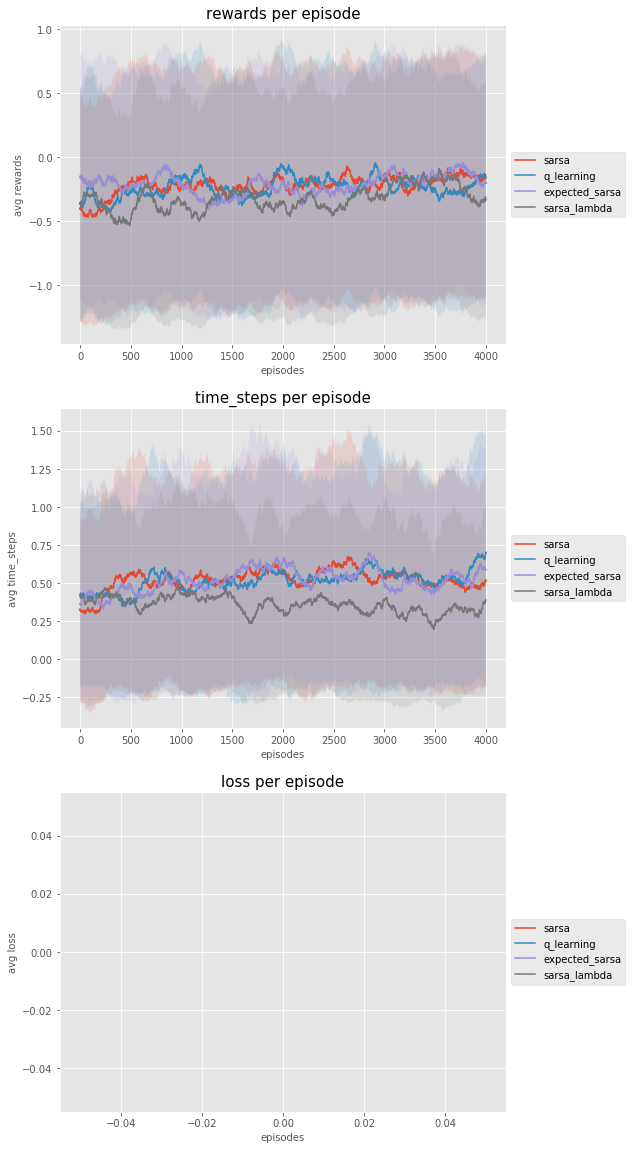

In [45]:
train_session.plot_results(window=200)

#### HEATMAP

In [14]:
import seaborn as sb

In [ ]:
for agent_name, agent in agents.items():
    sb.heatmap(agent.q.reshape(4, 4, 12).mean(axis=0), l)

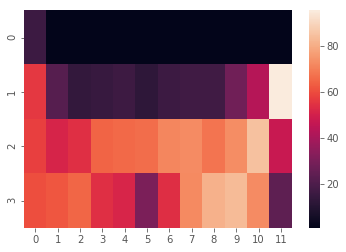

In [15]:
sb.heatmap(agents["q_learning_agent"].q.reshape(4, 4, 12).mean(axis=0)).set_title(agent_name)

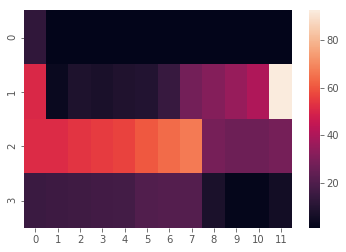

In [16]:
sb.heatmap(agents["expected_sarsa_agent"].q.reshape(4, 4, 12).mean(axis=0))

### TESTING

In [41]:
n_episode_test = 4
agent_to_test = agents["expected_sarsa_agent"]
graphical = True

In [31]:
for i_episode in range(n_episode_test):
    
    rewards = 0
    state = env.reset()
    next_action = agent_to_test.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            clear_output(wait=True)
            env.render()
            time.sleep(0.2)
            
        
        state, reward, done, info = env.step(next_action)
        next_action = agent_to_test.e_greedy(state, always_greedy=True)
        if done:
            break

agent_to_test.epsilon.reset_episode_count()
env.close()

SXXXXXXXXXXG
___________T
____________
____________
